In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
iris = pd.read_csv('../input/iris/Iris.csv')


This project is for learning regression methods in ML using Iris dataset. In  the Iiris dataset the datas are divided into three species using the following attributes sepal width,sepal length ,petal width and petal length
The flow of the project is as follows:
1. Data Preprocessing, EDA
2.Linear Regression 
3. Logistic Regression

This project uses various python librbaries for data analysis, data wrangling ,data visualisation and also sci-kit learn for ML algorithms.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
iris = pd.read_csv('../input/iris/Iris.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Learning through the datasets

In [5]:
iris.info()
iris.shape
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['Species'].unique()
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Therefore the dataset has 3 dfferent species

# Data Visulaisation

In [7]:
iris1= iris.drop('Id',axis=1)
gk= iris1.groupby('Species')
gk1 = gk.get_group('Iris-setosa')
gk2= gk.get_group('Iris-versicolor')
gk3= gk.get_group('Iris-virginica')
list=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
setosa=[]
for i in list:
   sum1 = gk1[i].mean()
   setosa.append(sum1)
print(setosa)

versicolor=[]
for i in list:
   sum1 = gk2[i].mean()
   versicolor.append(sum1)
print(versicolor)

virginica=[]
for i in list:
   sum1 = gk3[i].mean()
   virginica.append(sum1)
print(virginica)

data = pd.DataFrame([setosa,versicolor,virginica],index=['Setosa','Versicolor','Virginica'],columns=['Sepalength_mean','SepalWidth_mean','PetalLength_mean','PetalWidth_mean'])
print(data)


[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]
[5.936, 2.7700000000000005, 4.26, 1.3259999999999998]
[6.587999999999998, 2.9739999999999998, 5.552, 2.026]
            Sepalength_mean  SepalWidth_mean  PetalLength_mean  \
Setosa                5.006            3.418             1.464   
Versicolor            5.936            2.770             4.260   
Virginica             6.588            2.974             5.552   

            PetalWidth_mean  
Setosa                0.244  
Versicolor            1.326  
Virginica             2.026  


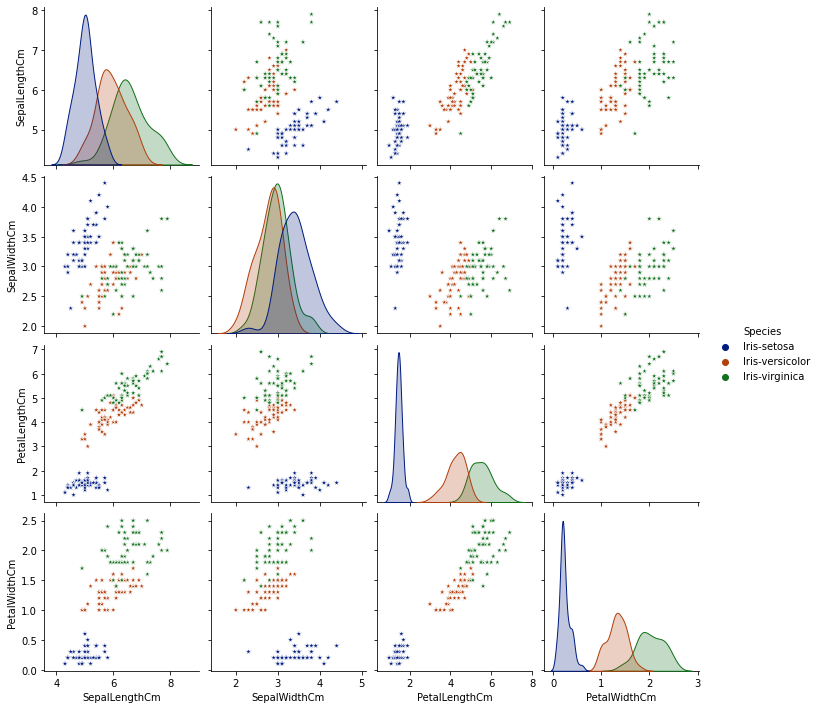

In [8]:
sns.pairplot(iris1,hue='Species',markers="*",kind='scatter',palette='dark')

The clusters in different colors correspind to clusters of different species.Setosa is very clearly separated

<AxesSubplot:>

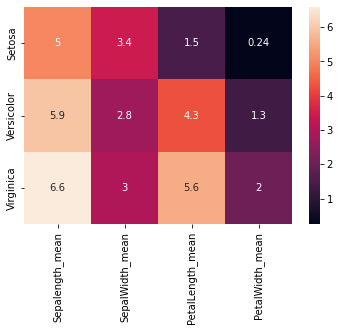

In [9]:
sns.heatmap(data,annot=True)

Here we can see the correlation between mean of different attributes to the species. A great variance in length occurs in the petalLength of the 3 sepcies.

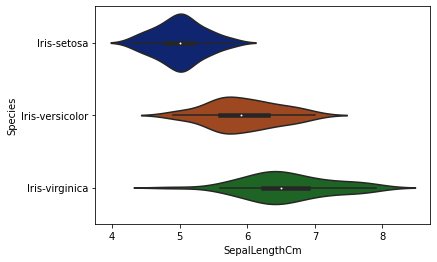

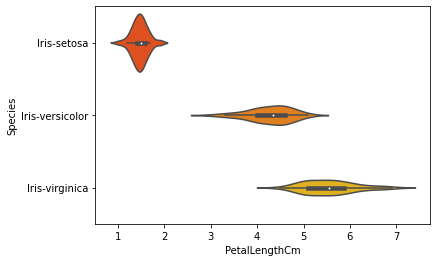

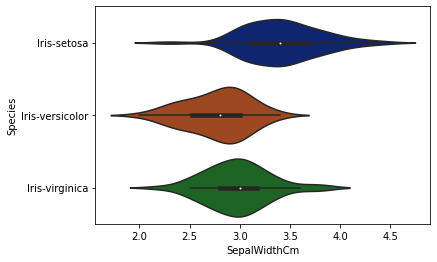

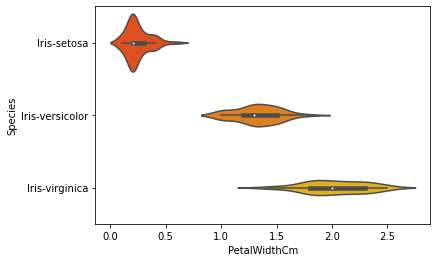

In [10]:
sns.violinplot(x='SepalLengthCm',y='Species',data=iris1,palette='dark')
plt.show()
sns.violinplot(x='PetalLengthCm',y='Species',data=iris1,palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm',y='Species',data=iris1,palette='dark')
plt.show()
sns.violinplot(x='PetalWidthCm',y='Species',data=iris1,palette='autumn')
plt.show()



# Predicting through our models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


# Linear Regression

In [12]:
iris1= iris1.sample(frac=1)





**PetalWidth and PetalLength**

[2.20729069]
1.103472146338265
Loss 0.17789172043917753


<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

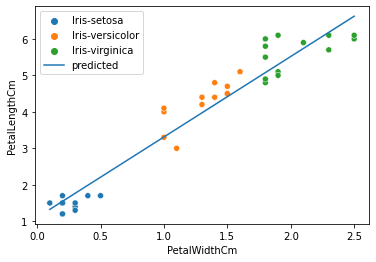

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalWidthCm'],iris1['PetalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")



[0.41736908]
-0.3716716501339776
Loss 0.045689296440775004


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

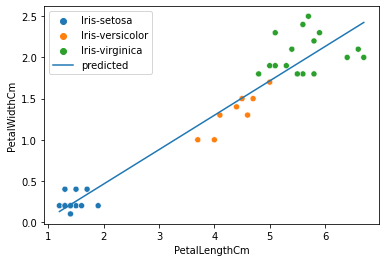

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalLengthCm'],iris1['PetalWidthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


**SepalLength and SepalWidth**

[-0.25040989]
6.604370034052213
Loss 0.6064207214642712


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

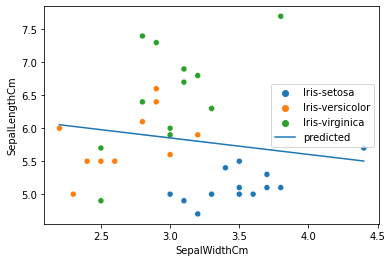

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['SepalWidthCm'],iris1['SepalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


[-0.1531344]
6.237048730147625
Loss 0.8236776795550848


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

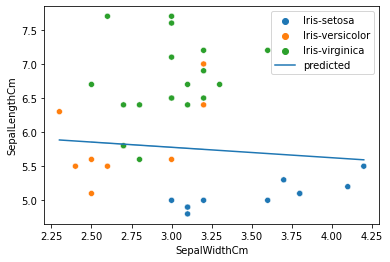

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['SepalWidthCm'],iris1['SepalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


**PetalLength and SepalWidth**

[-0.08717772]
3.394109693992519
Loss 0.15980907262903454


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

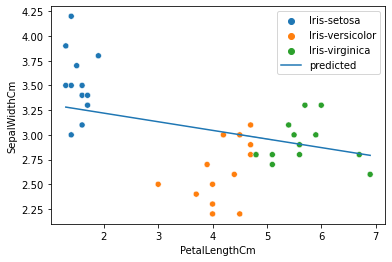

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalLengthCm'],iris1['SepalWidthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


[-1.65589945]
8.855015280795662
Loss 2.609949172066694


<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

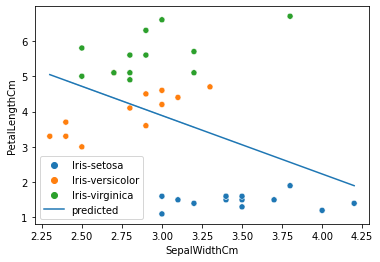

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['SepalWidthCm'],iris1['PetalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")

**PetalLEngth and SepalLength**

[0.40874714]
4.31011320746968
Loss 0.1357398523444315


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

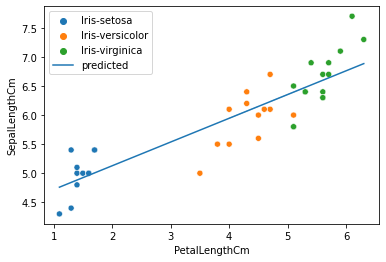

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalLengthCm'],iris1['SepalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


[-0.22302544]
3.345430779092308
Loss 0.18443271664545474


<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

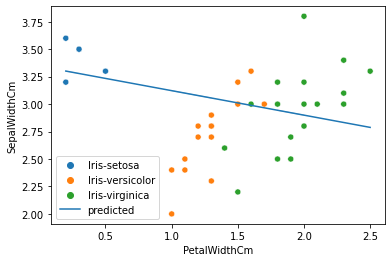

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalWidthCm'],iris1['SepalWidthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


[0.4185086]
4.231740872526226
Loss 0.19001905377480602


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

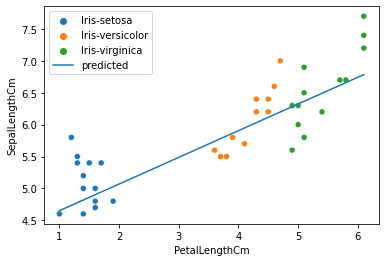

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalLengthCm'],iris1['SepalLengthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = LinearRegression().fit(X_train1,Y_train)

print(reg.coef_)
print(reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")


From all the graph we see that PetalLenth Vs PetalWidth gives the least error.

**Ridge Model for PetalWidth and PetalLength**

Coefficient [0.41802295]
Intercept -0.36397778438628614
Loss 0.05672902862262328


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

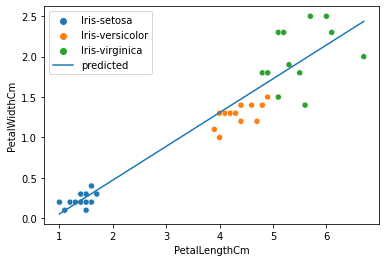

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
X_train,X_test,Y_train,Y_test = train_test_split(iris1['PetalLengthCm'],iris1['PetalWidthCm'])
X_train1 = X_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
reg = ridge.fit(X_train1,Y_train)

print("Coefficient",reg.coef_)
print("Intercept",reg.intercept_)
predict= reg.predict(X_test1)
loss = mean_squared_error(Y_test,predict)

print("Loss",loss)
sns.scatterplot(x=X_test,y=Y_test,data=iris1,hue="Species")
sns.lineplot(x= X_test,y=predict,label="predicted")

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [24]:
iris1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


We see that the highest correlation is between PetalLength and PetalWidth.This is very conducive to our previous results. So we are using this in logistic regression for prediction

In [25]:
iris1= iris.drop(['Id'],axis=1)
le = LabelEncoder()
iris1['Species']= le.fit_transform(iris1['Species'])
iris1
X= iris1.iloc[:,:-1]
Y= iris1.iloc[:,-1]
print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=40)
model = LogisticRegression(max_iter=100)
model.fit(X_train,Y_train)

predict= model.predict(X_test)
print(predict)

print("Classification Report\n",classification_report(Y_test,predict))
print(metrics.accuracy_score(Y_test,predict))

print(confusion_matrix(Y_test,predict))









[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0
[[14  0  0]
 [ 0 13  0]
 [ 0  0 11]]
